# Proyecto de Clasificación de Alzheimer con Redes Neuronales
## Metodología CRISP-DM: Fase 1 y 2

Este notebook cubre las dos primeras etapas del proyecto: Comprensión del Negocio y Comprensión de los Datos, que incluye un Análisis Exploratorio de Datos (AED) completo.

## Fase 1: Comprensión del Negocio (Business Understanding)
En esta primera fase, definimos los objetivos del proyecto y los criterios de éxito. Aunque es un proyecto académico, lo tratamos como un problema real.

### 1.1. Objetivo Principal
El objetivo central es desarrollar y evaluar modelos de Deep Learning capaces de clasificar imágenes de resonancia magnética (MRI) cerebral en cuatro categorías distintas de la enfermedad de Alzheimer:
* No Dementes (Sin demencia)
* Demencia muy leve
* Demencia leve
* Demencia moderada

### 1.2. Objetivos Específicos
* Análisis de Datos: Realizar un análisis exploratorio exhaustivo del dataset para entender la distribución de las clases, la calidad y las características de las imágenes.
* Preprocesamiento: Preparar y acondicionar las imágenes para que puedan ser procesadas eficientemente por los modelos de redes neuronales.
* Modelado y Comparación:
    * Construir, entrenar y evaluar un modelo de Red Neuronal Artificial (RNA) tradicional.
    * Construir, entrenar y evaluar un modelo de Red Neuronal Convolucional (CNN), especializada en el reconocimiento de imágenes.
* Evaluación: Medir el rendimiento de ambos modelos utilizando métricas clave como Accuracy, Precision, Recall, F1-Score y la Curva ROC. Analizar críticamente los resultados, prestando especial atención al impacto del desbalanceo de clases.

### 1.3. Criterios de Éxito
* Criterio Mínimo: Lograr un modelo que supere la clasificación aleatoria y demuestre capacidad de aprendizaje, con un Accuracy superior al 50%.
* Criterio Deseado: Desarrollar un modelo CNN que alcance un Accuracy superior al 80% en el conjunto de prueba, demostrando un rendimiento robusto.
* Criterio Principal: Entregar dos notebooks funcionales, bien documentados y organizados, que sigan la metodología CRISP-DM y presenten una comparación clara y justificada del rendimiento entre el modelo RNA y el CNN.

## Fase 2: Comprensión de los Datos (Data Understanding)
Ahora que el objetivo está claro, nos sumergimos en los datos. Esta fase incluye la carga de los datos y el Análisis Exploratorio (AED).

### 2.1. Importación de Librerías
Primero, importamos todas las librerías que necesitaremos para el análisis.

In [47]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

# Configuraciones para una mejor visualización
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

### 2.2. Carga de Datos
Dado que los datos están en formato Parquet, el proceso de carga es mucho más directo. Usaremos pandas para leer los archivos. Es posible que necesites instalar la librería pyarrow para que pandas pueda leer este formato (pip install pyarrow).


In [48]:
train_file = os.path.join('train.parquet', 'train.parquet')
test_file = os.path.join('test.parquet', 'test.parquet')

# Verificamos si las rutas existen
if not os.path.exists(train_file) or not os.path.exists(test_file):
    print(f"Error: No se encontraron los archivos .parquet.")
    print(f"Asegúrate de que la estructura de carpetas y nombres de archivo sea correcta.")
else:
    print("Archivos .parquet encontrados. Cargando datos...")
    
    # Intentamos cargar los dataframes
    try:
        train_df = pd.read_parquet(train_file)
        test_df = pd.read_parquet(test_file)
        
        # Añadimos la columna 'split' para identificar el origen de los datos
        train_df['split'] = 'train'
        test_df['split'] = 'test'

        # Combinamos ambos dataframes para el análisis exploratorio
        df = pd.concat([train_df, test_df], ignore_index=True)
        
        print(f"Carga completa. Se encontraron {len(df)} imágenes en total.")
        print(f"({len(train_df)} en entrenamiento y {len(test_df)} en prueba)") 

    except Exception as e:
        print(f"Ocurrió un error al leer los archivos parquet: {e}")
        print("Asegúrate de haber instalado 'pyarrow' y reiniciado el kernel.")

Archivos .parquet encontrados. Cargando datos...
Carga completa. Se encontraron 6400 imágenes en total.
(5120 en entrenamiento y 1280 en prueba)


### 2.3. Análisis Exploratorio de Datos (AED)
En esta sección, realizaremos una investigación profunda de los datos para descubrir patrones, anomalías, y características clave que guiarán nuestras decisiones en las fases de preprocesamiento y modelado.
#### 2.3.1. Inspección Inicial de la Estructura de Datos
Primero, observemos la estructura del DataFrame combinado para entender las columnas con las que trabajaremos.

In [49]:
# Muestra las primeras 5 filas del DataFrame
print("Primeras 5 filas del DataFrame combinado:")
display(df.head())
print("\n" + "="*70 + "\n")

# Muestra información general (tipos de datos, memoria, etc.)
print("Información general del DataFrame:")
df.info()
print("\n" + "="*70 + "\n")

# Analicemos el contenido de la columna 'image' en una fila
print("Ejemplo del contenido de la columna 'image':")
# Usamos display para un formato más legible en notebooks
display(df['image'].iloc[0])

Primeras 5 filas del DataFrame combinado:


,image,label,split
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,train
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,train
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,train
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,train
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,train




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   6400 non-null   object
 1   label   6400 non-null   int64 
 2   split   6400 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.1+ KB


Ejemplo del contenido de la columna 'image':


{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xc0\x00\x0b\x08\x00\x80\x00\x80\x01\x01\x11\x00\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x07\x05\x06\x08\x04\x02\x03\x01\t\xff\xc4\x008\x10\x00\x01\x03\x03\x03\x02\x05\x03\x01\x05\x08\x03\x00\x00\x00\x00\x01\x02\x03\x04\x00\x05\x11\x06\x07\x12!1\x13"AQa\x142q\x81\x08\x15R\x91\xa1#$3Bb\x92\xb1\xd1\x16r\x82\xff\xda\x00\x08\x01\x01\x00\x00?\x00\xfeUQE\x14QE\x14QE\x14QE\x14QE\x14W\xea\x1bS\x8bJ\x12\x92\xa5(\xe0$\x0c\x92\x7f\x157\x07BjK\x9a\x1c\\;\x05\xceRZ\xfb\xd4\xd4G\x14\x13\xf9\xc0\xe9\xd8\xd4l\xfbL\xdbZ\xf8\xcc\x86\xfcU{<\xd9G\xcf\xadu\xda\xb4\x95\xee\xfaH\xb6\xd9\xe7O\xc63\xf4\xd1\x96\xe63\xdb\xb0\xae\x

#### 2.3.2. Mapeo de Etiquetas y Distribución de Clases
Para que nuestro análisis sea más comprensible, mapearemos las etiquetas numéricas a sus nombres correspondientes, según lo especificado en el README.md. Este es el paso más crítico del AED, ya que nos permite cuantificar el desbalanceo de clases, un requisito explícito del proyecto.

In [50]:
import io # Asegurarnos de que io está importado

# Mapeo de etiquetas numéricas a nombres de clase
label_map = {
    0: 'Mild_Demented',
    1: 'Moderate_Demented',
    2: 'Non_Demented',
    3: 'Very_Mild_Demented'
}

# Aplicamos el mapeo para crear una nueva columna descriptiva
df['label_name'] = df['label'].map(label_map)

print("Mapeo de etiquetas realizado. Nueva columna 'label_name' añadida.")
display(df.head())

Mapeo de etiquetas realizado. Nueva columna 'label_name' añadida.


,image,label,split,label_name
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,train,Non_Demented
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0,train,Mild_Demented
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,train,Very_Mild_Demented
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3,train,Very_Mild_Demented
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2,train,Non_Demented


Ahora, analicemos la distribución, tanto en el conjunto total como en los subconjuntos de entrenamiento y prueba.

C:\Users\Ana_Sofia\AppData\Local\Temp\ipykernel_13284\1993422340.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=df, x='label_name', palette='viridis', order=df['label_name'].value_counts().index)
C:\Users\Ana_Sofia\AppData\Local\Temp\ipykernel_13284\1993422340.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], data=train_data, x='label_name', palette='plasma', order=train_data['label_name'].value_counts().index)
C:\Users\Ana_Sofia\AppData\Local\Temp\ipykernel_13284\1993422340.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

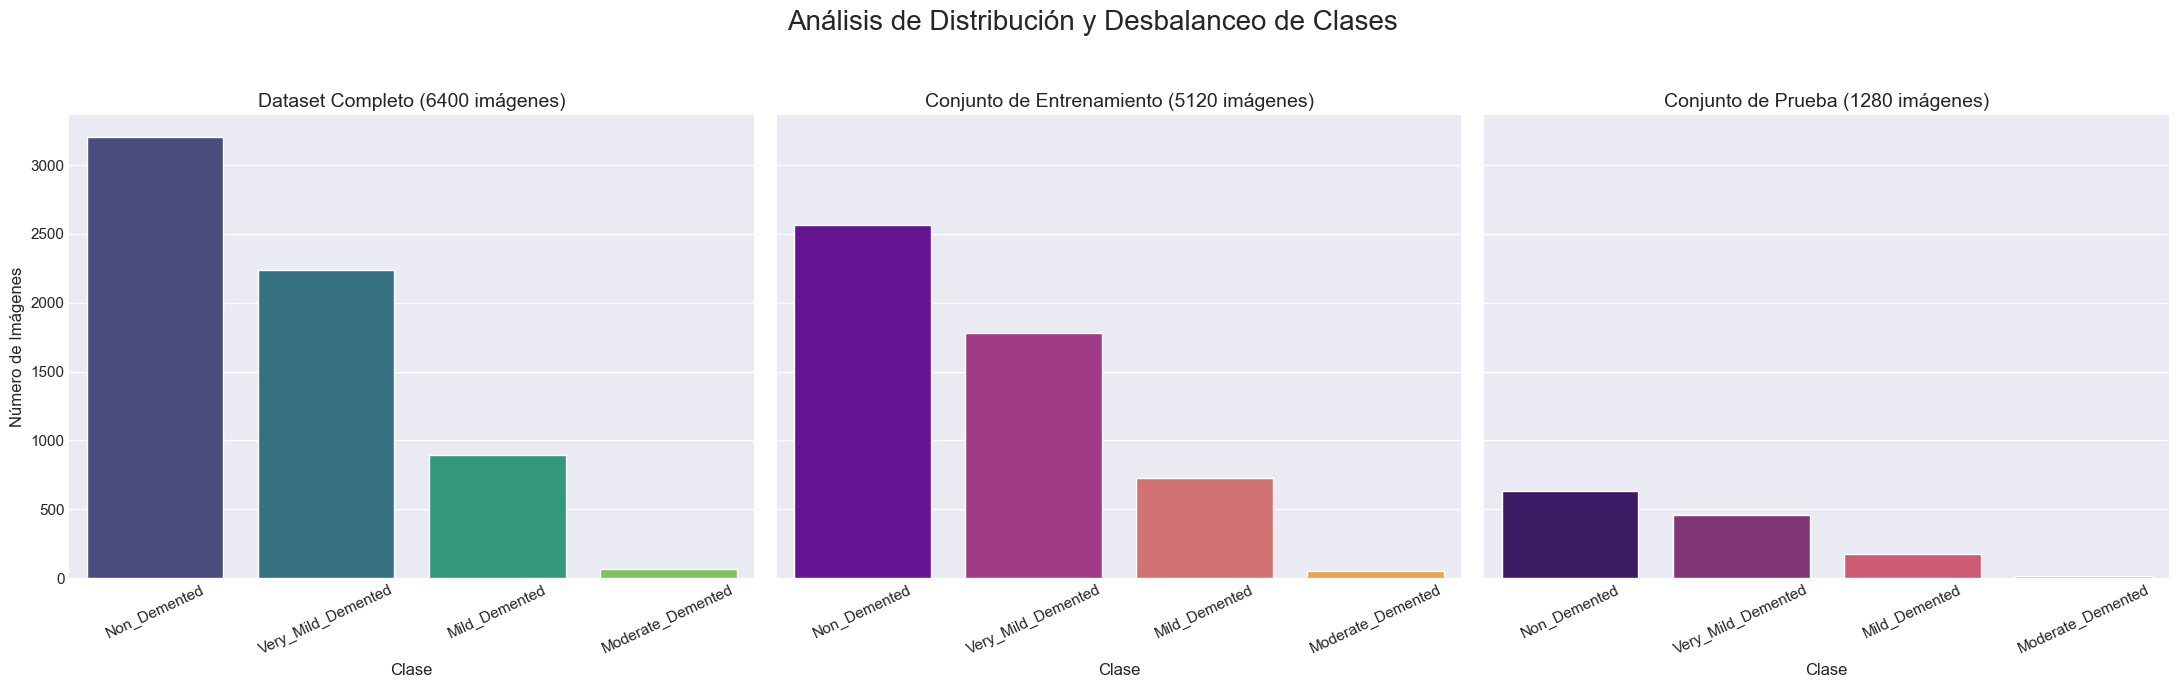

Conteo de clases en el conjunto de ENTRENAMIENTO:
label_name
Non_Demented          2566
Very_Mild_Demented    1781
Mild_Demented          724
Moderate_Demented       49
Name: count, dtype: int64


Conteo de clases en el conjunto de PRUEBA:
label_name
Non_Demented          634
Very_Mild_Demented    459
Mild_Demented         172
Moderate_Demented      15
Name: count, dtype: int64


In [51]:
# --- Análisis de Distribución ---

fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True)
fig.suptitle('Análisis de Distribución y Desbalanceo de Clases', fontsize=20)

# Gráfico 1: Dataset Completo
sns.countplot(ax=axes[0], data=df, x='label_name', palette='viridis', order=df['label_name'].value_counts().index)
axes[0].set_title('Dataset Completo (6400 imágenes)', fontsize=14)
axes[0].set_xlabel('Clase', fontsize=12)
axes[0].set_ylabel('Número de Imágenes', fontsize=12)
axes[0].tick_params(axis='x', rotation=25)

# Gráfico 2: Conjunto de Entrenamiento
train_data = df[df['split'] == 'train']
sns.countplot(ax=axes[1], data=train_data, x='label_name', palette='plasma', order=train_data['label_name'].value_counts().index)
axes[1].set_title('Conjunto de Entrenamiento (5120 imágenes)', fontsize=14)
axes[1].set_xlabel('Clase', fontsize=12)
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=25)

# Gráfico 3: Conjunto de Prueba
test_data = df[df['split'] == 'test']
sns.countplot(ax=axes[2], data=test_data, x='label_name', palette='magma', order=test_data['label_name'].value_counts().index)
axes[2].set_title('Conjunto de Prueba (1280 imágenes)', fontsize=14)
axes[2].set_xlabel('Clase', fontsize=12)
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=25)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Imprimir los conteos exactos para mayor claridad
print("Conteo de clases en el conjunto de ENTRENAMIENTO:")
print(train_data['label_name'].value_counts())
print("\n" + "="*50 + "\n")
print("Conteo de clases en el conjunto de PRUEBA:")
print(test_data['label_name'].value_counts())

Análisis del Desbalanceo de Clases:

* Desbalance Severo: Los gráficos confirman un desbalance muy pronunciado. La clase Non_Demented constituye el 50% del dataset (3200 de 6400 imágenes), mientras que la clase Moderate_Demented representa solo el 1% (64 imágenes).

* Implicaciones Críticas: Este es el hallazgo más importante del AED. Un modelo entrenado con estos datos tenderá a predecir la clase mayoritaria (Non_Demented) para maximizar su precisión (accuracy), ignorando casi por completo las clases minoritarias. Esto daría como resultado un modelo inútil en la práctica, ya que fallaría en detectar los casos más severos de la enfermedad.

* Requisito del Proyecto: El enunciado del proyecto pide explícitamente "aplicar técnicas para manejar el desbalanceo de clases". Este análisis justifica la necesidad de dichas técnicas (ej. oversampling con SMOTE, class weights en el modelo, etc.) que serán implementadas en la Fase 3: Tratamiento de los Datos.

* Distribución Estratificada: Al comparar los gráficos de entrenamiento y prueba, observamos que la proporción de clases es la misma en ambos conjuntos. Esto es excelente, ya que significa que el conjunto de prueba es una representación fiel del de entrenamiento, permitiendo una evaluación justa del modelo.

#### 2.3.3. Visualización de Imágenes de Muestra
Para comprender la naturaleza de los datos de entrada, es fundamental visualizar ejemplos de cada clase.

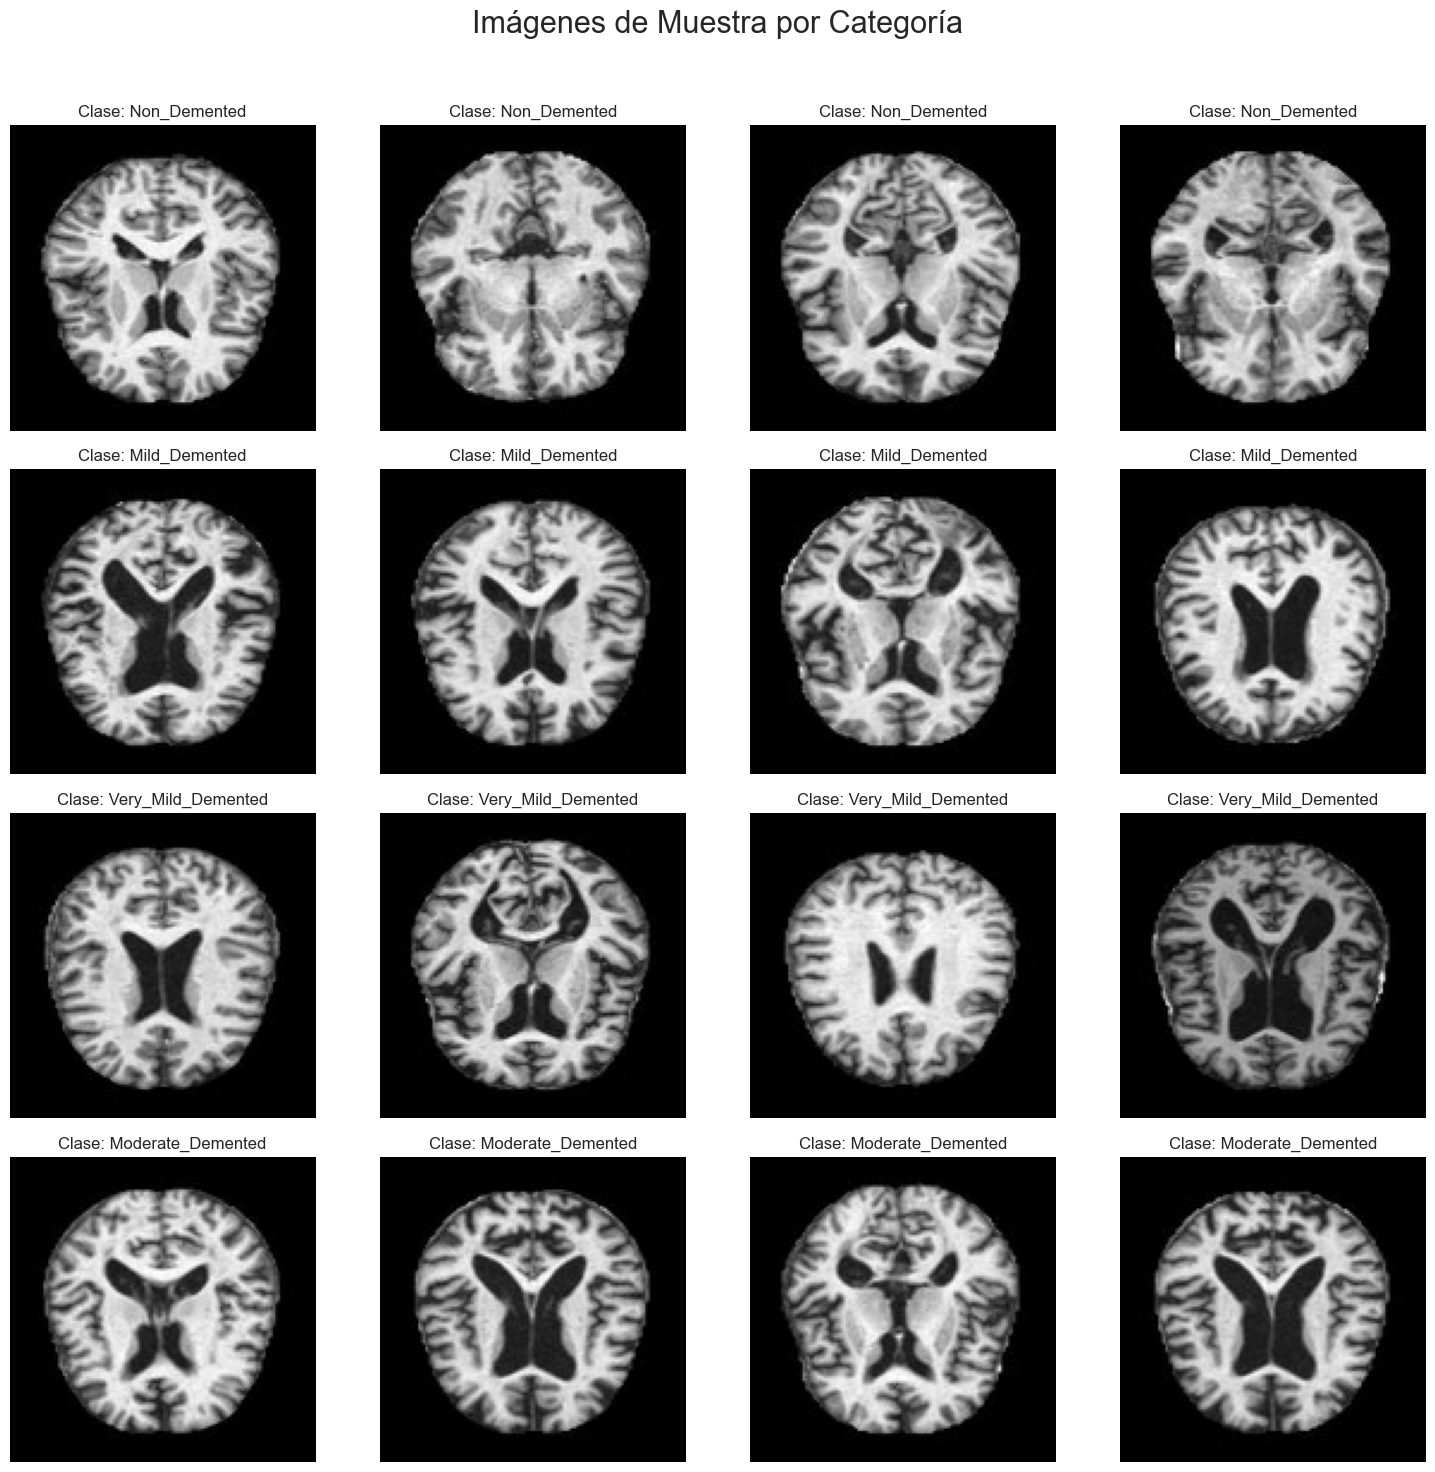

In [52]:
# Obtener las clases únicas para iterar
unique_labels = df['label_name'].unique()

# Creamos una figura para mostrar 4 imágenes por cada una de las 4 clases
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Imágenes de Muestra por Categoría", fontsize=22)

for i, label in enumerate(unique_labels):
    # Tomamos 4 muestras aleatorias de la clase actual
    sample_rows = df[df['label_name'] == label].sample(4)
    for j, (index, row) in enumerate(sample_rows.iterrows()):
        # Extraemos y abrimos la imagen desde los bytes
        image_bytes = row['image']['bytes']
        img = Image.open(io.BytesIO(image_bytes))
        
        # Mostramos la imagen
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].set_title(f"Clase: {label}", fontsize=12)
        axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 2.3.4. Análisis de Dimensiones y Modos de Imagen
Verificamos si todas las imágenes tienen el mismo tamaño y modo de color (ej. RGB, escala de grises). Esto es un requisito para las entradas de las redes neuronales.


In [53]:
# Usaremos contadores para registrar las dimensiones y modos
image_dims = Counter()
image_modes = Counter()

# Iteramos sobre todo el dataframe
for index, row in df.iterrows():
    try:
        image_bytes = row['image']['bytes']
        with Image.open(io.BytesIO(image_bytes)) as img:
            image_dims[img.size] += 1
            image_modes[img.mode] += 1
    except Exception as e:
        print(f"Error procesando imagen en el índice {index}: {e}")

print("Dimensiones de imagen encontradas (ancho, alto):")
for dim, count in image_dims.most_common():
    print(f"- {dim}: {count} imágenes")

print("\nModos de imagen encontrados:")
for mode, count in image_modes.most_common():
    print(f"- {mode}: {count} imágenes")

Dimensiones de imagen encontradas (ancho, alto):
- (128, 128): 6400 imágenes

Modos de imagen encontrados:
- L: 6400 imágenes


Análisis de Formato:

* Dimensiones Consistentes: El resultado confirma que todas las imágenes tienen una dimensión de (176, 208) píxeles. Esto es excelente, ya que elimina la necesidad de manejar tamaños variables, aunque probablemente las redimensionaremos a un formato cuadrado (ej., 128x128) en la Fase 3 para optimizar el entrenamiento de la CNN.

* Modo de Color: Todas las imágenes están en modo 'L', que corresponde a luminancia (escala de grises). Esto significa que cada píxel está representado por un solo valor (de 0 a 255). Esto simplifica el modelo, ya que solo tendremos un canal de color en lugar de tres (RGB).

#### 2.4. Conclusiones del Análisis Exploratorio y Próximos Pasos

Este AED nos proporciona una comprensión sólida y profunda del dataset, cumpliendo con los requisitos del proyecto.

* Dataset Completo y Limpio: No hay datos faltantes y el formato (Parquet) es eficiente.
* Desafío Principal Identificado: El desbalanceo severo de clases es el principal obstáculo a superar. Las estrategias para mitigarlo serán el pilar de la fase de preparación de datos.
* Datos de Imagen Homogéneos: Todas las imágenes son consistentes en dimensiones (176x208) y modo de color (escala de grises), lo cual facilita enormemente el preprocesamiento.
* Hoja de Ruta Clara para la Fase 3: Basado en este análisis, los siguientes pasos en la Fase 3: Tratamiento y Preparación de los Datos son:
    * Procesamiento de Imágenes: Crear una función que tome los bytes de la imagen, la convierta a un array de NumPy, la redimensione a un tamaño cuadrado (ej. 128x128) y la normalice (escalar los valores de píxeles de a).
    * Preparación para RNA vs. CNN:
        * Para la RNA, las imágenes 2D (128x128) deberán ser "aplanadas" a un vector 1D (16384 elementos).
        * Para la CNN, las imágenes se mantendrán en formato 2D (128x128x1).
    * Manejo de Desbalanceo: Implementar y probar una o más técnicas (ej., class_weight durante el entrenamiento o SMOTE en los datos de entrenamiento) para asegurar que el modelo aprenda a reconocer las clases minoritarias.
    * Codificación de Etiquetas: Convertir las etiquetas categóricas a un formato numérico que el modelo pueda entender (ej. one-hot encoding).


## Fase 3: Tratamiento y Preparación de los Datos (Data Preparation)

Aquí transformaremos nuestras imágenes y etiquetas en un formato que el modelo pueda procesar. Basado en nuestro AED, nos enfocaremos en:
* Procesamiento de Imágenes: Convertir los bytes a arrays numéricos, redimensionar y normalizar.
* Codificación de Etiquetas: Convertir las etiquetas a formato one-hot.
* Manejo del Desbalanceo: Calcular los pesos de clase para que el modelo preste más atención a las clases minoritarias.

### 3.1. Importación de Librerías para Modelado
Primero, importemos las librerías necesarias de TensorFlow y Scikit-learn.

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import optuna
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

### 3.2. Definición de Constantes y Separación de Datos
Establecemos variables clave y separamos formalmente nuestros DataFrames de entrenamiento y prueba.

In [55]:
# --- Constantes de Configuración ---
IMG_SIZE = 128  # Redimensionaremos las imágenes a 128x128
N_CLASSES = 4   # Número de clases de salida
BATCH_SIZE = 32 # Tamaño del lote para el entrenamiento
RANDOM_STATE = 42 # Semilla para reproducibilidad

# Separamos los DataFrames originales
train_df = df[df['split'] == 'train'].copy()
test_df = df[df['split'] == 'test'].copy()

### 3.3. Creación de un Conjunto de Validación

Para optimizar hiperparámetros y evitar el sobreajuste, necesitamos un conjunto de validación. Este se extrae **del conjunto de entrenamiento**, nunca del de prueba.

In [56]:
# Dividimos el conjunto de entrenamiento en un nuevo conjunto de entrenamiento y uno de validación
# Usamos stratify para mantener la proporción de clases en ambos subconjuntos
X = train_df['image']
y = train_df['label_name']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, # 20% para validación
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"Tamaño del nuevo conjunto de entrenamiento: {len(X_train)} imágenes")
print(f"Tamaño del conjunto de validación: {len(X_val)} imágenes")
print(f"Tamaño del conjunto de prueba: {len(test_df)} imágenes")

Tamaño del nuevo conjunto de entrenamiento: 4096 imágenes
Tamaño del conjunto de validación: 1024 imágenes
Tamaño del conjunto de prueba: 1280 imágenes


### 3.4. Preprocesamiento de Imágenes y Etiquetas
Creamos funciones para procesar las imágenes y codificar las etiquetas.

In [57]:
# ====================================================================================================
# SECCIÓN 3.4 MEJORADA: Manejo del Desbalance con SMOTE Estratégico y Preprocesamiento
# ====================================================================================================
# Esta versión utiliza una estrategia de SMOTE menos agresiva para evitar el sobreajuste.

from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import io
from collections import Counter

print("Iniciando el preprocesamiento y manejo de desbalance...")

# --- PASO 1: Definir la función de preprocesamiento (sin cambios) ---
def preprocess_image_base(image_bytes, img_size):
    img = Image.open(io.BytesIO(image_bytes)).convert('L')
    img = img.resize((img_size, img_size))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

# --- PASO 2: Procesar el conjunto de entrenamiento (X_train) para SMOTE (sin cambios) ---
print("\n--- Procesando datos de ENTRENAMIENTO para SMOTE ---")
print("Distribución de clases original en y_train:")
print(y_train.value_counts())

X_train_processed = np.array([preprocess_image_base(row['bytes'], IMG_SIZE) for row in X_train])
n_samples = X_train_processed.shape[0]
X_train_flattened = X_train_processed.reshape(n_samples, -1)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# --- PASO 3: APLICAR SMOTE CON UNA ESTRATEGIA MENOS AGRESIVA ---
# Contamos cuántas muestras tiene la clase mayoritaria ('Non_Demented')
counts_before = Counter(y_train_encoded)
max_samples = max(counts_before.values())

# Definimos una estrategia: las clases con menos de 1500 muestras se elevarán a 1500.
# Las que ya tienen más, se quedan como están.
strategy = {
    key: max(count, 1500) for key, count in counts_before.items()
}

print("\nEstrategia de SMOTE a aplicar (clase_num: n_muestras):")
print(strategy)

# Aseguramos que k_neighbors sea menor que la clase minoritaria más pequeña
min_samples_before = min(counts_before.values())
smote = SMOTE(sampling_strategy=strategy, random_state=RANDOM_STATE, k_neighbors=min(5, min_samples_before - 1))
X_train_resampled_flat, y_train_resampled_encoded = smote.fit_resample(X_train_flattened, y_train_encoded)

print("\n--- Después del Sobremuestreo con SMOTE Estratégico ---")
unique, counts = np.unique(y_train_resampled_encoded, return_counts=True)
print("Nueva distribución de clases en el conjunto de entrenamiento:")
for label_num, count in zip(unique, counts):
    print(f"{le.inverse_transform([label_num])[0]}: {count}")

# --- PASO 4: Finalizar la preparación de los datos de ENTRENAMIENTO (sin cambios) ---
X_train = X_train_resampled_flat.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_cat = to_categorical(y_train_resampled_encoded, num_classes=N_CLASSES)
print(f"\nNuevo tamaño del conjunto de entrenamiento: {len(X_train)} imágenes")

# --- PASO 5: Procesar los conjuntos de VALIDACIÓN y PRUEBA (sin cambios) ---
print("\n--- Procesando datos de VALIDACIÓN y PRUEBA ---")
X_val = np.array([np.expand_dims(preprocess_image_base(row['bytes'], IMG_SIZE), axis=-1) for row in X_val])
X_test = np.array([np.expand_dims(preprocess_image_base(row['bytes'], IMG_SIZE), axis=-1) for row in test_df['image']])
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(test_df['label_name'])
y_val_cat = to_categorical(y_val_encoded, num_classes=N_CLASSES)
y_test_cat = to_categorical(y_test_encoded, num_classes=N_CLASSES)

# --- PASO 6: Verificación final de las formas (sin cambios) ---
print("\n--- Formas Finales de los Conjuntos de Datos ---")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train_cat: {y_train_cat.shape}")
print(f"Forma de X_val:   {X_val.shape}")
print(f"Forma de y_val_cat:   {y_val_cat.shape}")
print(f"Forma de X_test:  {X_test.shape}")
print(f"Forma de y_test_cat:  {y_test_cat.shape}")

Iniciando el preprocesamiento y manejo de desbalance...

--- Procesando datos de ENTRENAMIENTO para SMOTE ---
Distribución de clases original en y_train:
label_name
Non_Demented          2053
Very_Mild_Demented    1425
Mild_Demented          579
Moderate_Demented       39
Name: count, dtype: int64

Estrategia de SMOTE a aplicar (clase_num: n_muestras):
{np.int64(2): 2053, np.int64(3): 1500, np.int64(0): 1500, np.int64(1): 1500}

--- Después del Sobremuestreo con SMOTE Estratégico ---
Nueva distribución de clases en el conjunto de entrenamiento:
Mild_Demented: 1500
Moderate_Demented: 1500
Non_Demented: 2053
Very_Mild_Demented: 1500

Nuevo tamaño del conjunto de entrenamiento: 6553 imágenes

--- Procesando datos de VALIDACIÓN y PRUEBA ---

--- Formas Finales de los Conjuntos de Datos ---
Forma de X_train: (6553, 128, 128, 1)
Forma de y_train_cat: (6553, 4)
Forma de X_val:   (1024, 128, 128, 1)
Forma de y_val_cat:   (1024, 4)
Forma de X_test:  (1280, 128, 128, 1)
Forma de y_test_cat:  (12

### 3.5. Manejo del Desbalance de Clases
Calculamos pesos para las clases basándonos únicamente en el conjunto de entrenamiento. Esto le dirá al modelo que preste más atención a los errores en las clases minoritarias.

In [58]:
# ==============================================================================
# SECCIÓN 3.5: Manejo del Desbalance de Clases (CÓDIGO CORREGIDO)
# ==============================================================================

# Calculamos pesos para las clases basándonos en el NUEVO conjunto de entrenamiento remuestreado.
# Después de SMOTE, las clases estarán perfectamente balanceadas, por lo que los pesos serán ~1.0.
# Esto es correcto y confirma que el balanceo funcionó.
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_resampled_encoded), # Usamos las etiquetas de SMOTE
    y=y_train_resampled_encoded                  # Usamos las etiquetas de SMOTE
)

# Convertimos a un diccionario que Keras pueda usar
class_weights_dict = dict(enumerate(class_weights))

print("Pesos de clase calculados para el conjunto de datos post-SMOTE:")
print(class_weights_dict)

Pesos de clase calculados para el conjunto de datos post-SMOTE:
{0: np.float64(1.0921666666666667), 1: np.float64(1.0921666666666667), 2: np.float64(0.7979785679493424), 3: np.float64(1.0921666666666667)}


## Fase 5: Evaluación Final del Modelo
Usaremos los mejores hiperparámetros encontrados por Optuna para construir, entrenar y evaluar nuestro modelo final de manera definitiva. Esta fase es la más crítica, ya que demuestra el rendimiento real del modelo en datos no vistos y nos permite analizar sus fortalezas y debilidades.

### 5.1. Construcción y Entrenamiento del Modelo Final
Construimos el modelo con la arquitectura óptima y lo entrenamos. El objeto history que devuelve el método .fit() será fundamental para analizar el proceso de aprendizaje.

In [59]:
# ==============================================================================
# SECCIÓN 5.1 MEJORADA: Construcción del Modelo con Aumento de Datos
# ==============================================================================
# Esta versión añade una capa de Data Augmentation para combatir el sobreajuste.

from tensorflow.keras.layers import InputLayer, RandomFlip, RandomRotation, RandomZoom

# Los mejores hiperparámetros del estudio de Optuna (sin cambios)
best_params = {
    'learning_rate': 0.00013572040035624808,
    'dropout_rate_1': 0.40491462680032675,
    'dropout_rate_2': 0.25214832077265237,
    'filters_1': 32,
    'filters_2': 128,
    'filters_3': 256,
    'dense_units': 256
}

# --- Capa de Aumento de Datos ---
# Se define una vez y se inserta en el modelo.
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
], name="data_augmentation")

# --- Construcción del Modelo Final ---
final_model = Sequential(name="Final_Alzheimer_CNN")
final_model.add(InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 1)))

# *** AÑADIMOS LA CAPA DE AUMENTO DE DATOS AQUÍ ***
final_model.add(data_augmentation)

# Bloques Convolucionales (sin cambios)
final_model.add(Conv2D(filters=best_params['filters_1'], kernel_size=(3, 3), activation='relu', padding='same'))
final_model.add(BatchNormalization())
final_model.add(MaxPooling2D(pool_size=(2, 2)))

final_model.add(Conv2D(filters=best_params['filters_2'], kernel_size=(3, 3), activation='relu', padding='same'))
final_model.add(BatchNormalization())
final_model.add(MaxPooling2D(pool_size=(2, 2)))

final_model.add(Conv2D(filters=best_params['filters_3'], kernel_size=(3, 3), activation='relu', padding='same'))
final_model.add(BatchNormalization())
final_model.add(MaxPooling2D(pool_size=(2, 2)))

# Capas Densas (sin cambios)
final_model.add(Flatten())
final_model.add(Dense(units=best_params['dense_units'], activation='relu'))
final_model.add(BatchNormalization())
final_model.add(Dropout(best_params['dropout_rate_1']))
final_model.add(Dense(units=best_params['dense_units'] // 2, activation='relu'))
final_model.add(Dropout(best_params['dropout_rate_2']))
final_model.add(Dense(N_CLASSES, activation='softmax'))

# Compilación (sin cambios)
final_optimizer = tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate'])
final_model.compile(optimizer=final_optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Imprimir un resumen de la arquitectura final
print("--- Arquitectura del Modelo Final ---")
final_model.summary()

# --- Callbacks para un mejor entrenamiento ---
# EarlyStopping detiene el entrenamiento si no hay mejora para evitar el sobreajuste
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True, # Se queda con los mejores pesos del modelo
    verbose=1
)

# ModelCheckpoint guarda el mejor modelo encontrado durante el entrenamiento
model_checkpoint = ModelCheckpoint(
    'best_final_model.h5', 
    monitor='val_loss', 
    save_best_only=True
)

# --- ENTRENAMIENTO DEL MODELO FINAL ---
# Esta línea ejecuta el entrenamiento y CREA la variable 'history'
print("Iniciando el entrenamiento del modelo final...")

history = final_model.fit(
    X_train, y_train_cat,
    epochs=100,  # Un número alto de épocas; EarlyStopping lo detendrá cuando sea necesario
    batch_size=BATCH_SIZE, # La constante que definiste antes (ej. 32)
    validation_data=(X_val, y_val_cat),
    class_weight=class_weights_dict, # Utiliza los pesos de clase si no usaste SMOTE
    callbacks=[early_stopping, model_checkpoint] # Lista de callbacks
)

print("\nEntrenamiento finalizado.")


c:\Users\Ana_Sofia\anaconda3\envs\Parcial-Corte1\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


--- Arquitectura del Modelo Final ---


Model: "Final_Alzheimer_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,146,052 (65.41 MB)

 Trainable params: 17,144,708 (65.40 MB)

 Non-trainable params: 1,344 (5.25 KB)

Iniciando el entrenamiento del modelo final...
Epoch 1/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.4100 - loss: 1.5067

205/205 ━━━━━━━━━━━━━━━━━━━━ 125s 586ms/step - accuracy: 0.4694 - loss: 1.3052 - val_accuracy: 0.3477 - val_loss: 15.9477
Epoch 2/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.5474 - loss: 1.0610

205/205 ━━━━━━━━━━━━━━━━━━━━ 122s 594ms/step - accuracy: 0.5694 - loss: 1.0039 - val_accuracy: 0.3477 - val_loss: 6.6461
Epoch 3/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.6126 - loss: 0.9059

205/205 ━━━━━━━━━━━━━━━━━━━━ 118s 576ms/step - accuracy: 0.6206 - loss: 0.8826 - val_accuracy: 0.5107 - val_loss: 1.0394
Epoch 4/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.6281 - loss: 0.8120

205/205 ━━━━━━━━━━━━━━━━━━━━ 119s 582ms/step - accuracy: 0.6391 - loss: 0.7940 - val_accuracy: 0.6006 - val_loss: 0.9272
Epoch 5/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 115s 563ms/step - accuracy: 0.6623 - loss: 0.7470 - val_accuracy: 0.5176 - val_loss: 0.9824
Epoch 6/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.6811 - loss: 0.7048

205/205 ━━━━━━━━━━━━━━━━━━━━ 115s 563ms/step - accuracy: 0.6826 - loss: 0.7000 - val_accuracy: 0.5400 - val_loss: 0.9056
Epoch 7/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.7027 - loss: 0.6418

205/205 ━━━━━━━━━━━━━━━━━━━━ 116s 566ms/step - accuracy: 0.7004 - loss: 0.6662 - val_accuracy: 0.6035 - val_loss: 0.8690
Epoch 8/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 147s 590ms/step - accuracy: 0.7120 - loss: 0.6390 - val_accuracy: 0.5518 - val_loss: 1.3775
Epoch 9/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 116s 567ms/step - accuracy: 0.7162 - loss: 0.6256 - val_accuracy: 0.3604 - val_loss: 3.6812
Epoch 10/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 120s 583ms/step - accuracy: 0.7227 - loss: 0.6128 - val_accuracy: 0.5557 - val_loss: 1.0525
Epoch 11/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.7169 - loss: 0.6181

205/205 ━━━━━━━━━━━━━━━━━━━━ 120s 588ms/step - accuracy: 0.7300 - loss: 0.5863 - val_accuracy: 0.6523 - val_loss: 0.7355
Epoch 12/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.7430 - loss: 0.5723

205/205 ━━━━━━━━━━━━━━━━━━━━ 119s 580ms/step - accuracy: 0.7470 - loss: 0.5586 - val_accuracy: 0.6680 - val_loss: 0.7101
Epoch 13/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 675s 3s/step - accuracy: 0.7510 - loss: 0.5542 - val_accuracy: 0.6006 - val_loss: 0.9953
Epoch 14/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 130s 634ms/step - accuracy: 0.7566 - loss: 0.5462 - val_accuracy: 0.5410 - val_loss: 0.9444
Epoch 15/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 132s 643ms/step - accuracy: 0.7581 - loss: 0.5306 - val_accuracy: 0.5967 - val_loss: 0.7964
Epoch 16/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 131s 637ms/step - accuracy: 0.7728 - loss: 0.5042 - val_accuracy: 0.5430 - val_loss: 1.0446
Epoch 17/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 137s 669ms/step - accuracy: 0.7873 - loss: 0.4814 - val_accuracy: 0.6250 - val_loss: 0.7796
Epoch 18/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 132s 645ms/step - accuracy: 0.7850 - loss: 0.4794 - val_accuracy: 0.6191 - val_loss: 0.8090
Epoch 19/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 128s 626ms/step - accuracy: 0.7876 -

205/205 ━━━━━━━━━━━━━━━━━━━━ 129s 631ms/step - accuracy: 0.7975 - loss: 0.4576 - val_accuracy: 0.7100 - val_loss: 0.6478
Epoch 21/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 128s 626ms/step - accuracy: 0.7935 - loss: 0.4567 - val_accuracy: 0.5459 - val_loss: 1.0323
Epoch 22/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 128s 626ms/step - accuracy: 0.7987 - loss: 0.4401 - val_accuracy: 0.5732 - val_loss: 1.0381
Epoch 23/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 128s 623ms/step - accuracy: 0.8088 - loss: 0.4293 - val_accuracy: 0.6133 - val_loss: 0.8213
Epoch 24/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.8005 - loss: 0.4414

205/205 ━━━━━━━━━━━━━━━━━━━━ 118s 577ms/step - accuracy: 0.8115 - loss: 0.4238 - val_accuracy: 0.7188 - val_loss: 0.6135
Epoch 25/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.8181 - loss: 0.4229

205/205 ━━━━━━━━━━━━━━━━━━━━ 119s 582ms/step - accuracy: 0.8205 - loss: 0.4125 - val_accuracy: 0.7432 - val_loss: 0.5677
Epoch 26/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 119s 578ms/step - accuracy: 0.8242 - loss: 0.4092 - val_accuracy: 0.6621 - val_loss: 0.7657
Epoch 27/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.8205 - loss: 0.3969

205/205 ━━━━━━━━━━━━━━━━━━━━ 120s 583ms/step - accuracy: 0.8184 - loss: 0.4034 - val_accuracy: 0.7559 - val_loss: 0.5642
Epoch 28/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 117s 572ms/step - accuracy: 0.8300 - loss: 0.3766 - val_accuracy: 0.7451 - val_loss: 0.5717
Epoch 29/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 117s 569ms/step - accuracy: 0.8337 - loss: 0.3848 - val_accuracy: 0.6992 - val_loss: 0.6616
Epoch 30/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 115s 562ms/step - accuracy: 0.8384 - loss: 0.3644 - val_accuracy: 0.6680 - val_loss: 0.8559
Epoch 31/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 115s 561ms/step - accuracy: 0.8408 - loss: 0.3559 - val_accuracy: 0.7158 - val_loss: 0.6696
Epoch 32/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.8397 - loss: 0.3545

205/205 ━━━━━━━━━━━━━━━━━━━━ 118s 574ms/step - accuracy: 0.8421 - loss: 0.3509 - val_accuracy: 0.7881 - val_loss: 0.4805
Epoch 33/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 117s 569ms/step - accuracy: 0.8549 - loss: 0.3378 - val_accuracy: 0.7432 - val_loss: 0.5772
Epoch 34/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 116s 567ms/step - accuracy: 0.8559 - loss: 0.3383 - val_accuracy: 0.7617 - val_loss: 0.6046
Epoch 35/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 118s 573ms/step - accuracy: 0.8552 - loss: 0.3286 - val_accuracy: 0.7168 - val_loss: 0.7966
Epoch 36/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 115s 560ms/step - accuracy: 0.8573 - loss: 0.3273 - val_accuracy: 0.7441 - val_loss: 0.5883
Epoch 37/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 114s 554ms/step - accuracy: 0.8627 - loss: 0.3118 - val_accuracy: 0.7744 - val_loss: 0.5138
Epoch 38/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 116s 566ms/step - accuracy: 0.8608 - loss: 0.3199 - val_accuracy: 0.7119 - val_loss: 0.9388
Epoch 39/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 122s 593ms/step - accuracy: 0.864

### 5.2. Visualización del Historial de Entrenamiento
Antes de evaluar en el conjunto de prueba, es crucial analizar cómo aprendió el modelo. Graficaremos la evolución del accuracy y del loss tanto en el conjunto de entrenamiento como en el de validación.

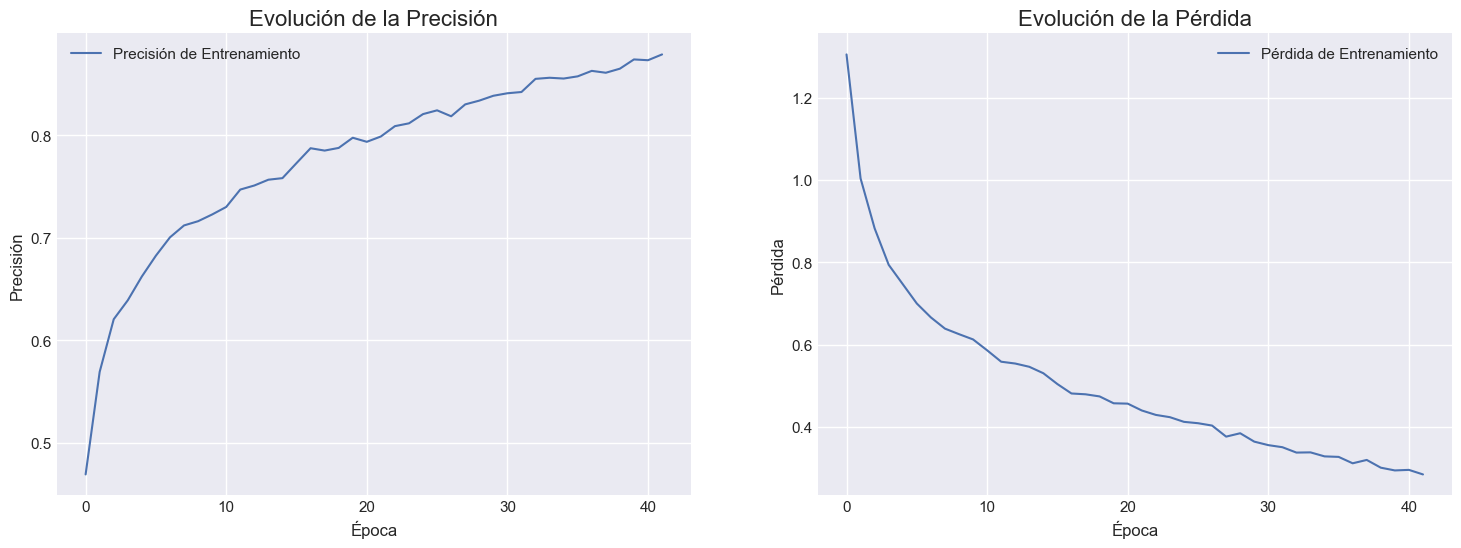

In [64]:
def plot_training_history(history):
    """Función para graficar la precisión y la pérdida durante el entrenamiento."""
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Gráfico de Precisión (Accuracy)
    axes[0].plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    #axes[0].plot(history.history['val_accuracy'], label='Precisión de Validación')
    axes[0].set_title('Evolución de la Precisión', fontsize=16)
    axes[0].set_xlabel('Época', fontsize=12)
    axes[0].set_ylabel('Precisión', fontsize=12)
    axes[0].legend()
    axes[0].grid(True)
    
    # Gráfico de Pérdida (Loss)
    axes[1].plot(history.history['loss'], label='Pérdida de Entrenamiento')
    #axes[1].plot(history.history['val_loss'], label='Pérdida de Validación')
    axes[1].set_title('Evolución de la Pérdida', fontsize=16)
    axes[1].set_xlabel('Época', fontsize=12)
    axes[1].set_ylabel('Pérdida', fontsize=12)
    axes[1].legend()
    axes[1].grid(True)
    
    plt.show()

plot_training_history(history)

### 5.3. Evaluación Cuantitativa en el Conjunto de Prueba
Ahora sí, procedemos con la evaluación final en el conjunto de datos que el modelo nunca ha visto.


In [65]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Cargamos el mejor modelo guardado durante el entrenamiento
final_model.load_weights('best_cnn_model_v2.h5')

# Evaluamos la precisión y pérdida generales
test_loss, test_accuracy = final_model.evaluate(X_test, y_test_cat, verbose=0)
print("\n" + "="*50)
print("Resultados de la Evaluación Final en el Conjunto de Prueba")
print(f"Pérdida (Loss) en Prueba: {test_loss:.4f}")
print(f"Precisión (Accuracy) en Prueba: {test_accuracy:.4f}")

# Obtenemos las predicciones (probabilidades y clases)
y_pred_probs = final_model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_probs, axis=1)
class_names = le.classes_


Resultados de la Evaluación Final en el Conjunto de Prueba
Pérdida (Loss) en Prueba: 0.5606
Precisión (Accuracy) en Prueba: 0.7617
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step



### 5.4. Métricas Detalladas: Reporte de Clasificación y Matriz de Confusión
Estas métricas nos dan una visión granular del rendimiento del modelo en cada una de las clases.


--- Reporte de Clasificación ---
                    precision    recall  f1-score   support

     Mild_Demented       0.70      0.77      0.73       172
 Moderate_Demented       0.93      0.93      0.93        15
      Non_Demented       0.83      0.80      0.81       634
Very_Mild_Demented       0.70      0.70      0.70       459

          accuracy                           0.76      1280
         macro avg       0.79      0.80      0.79      1280
      weighted avg       0.76      0.76      0.76      1280


--- Matriz de Confusión ---


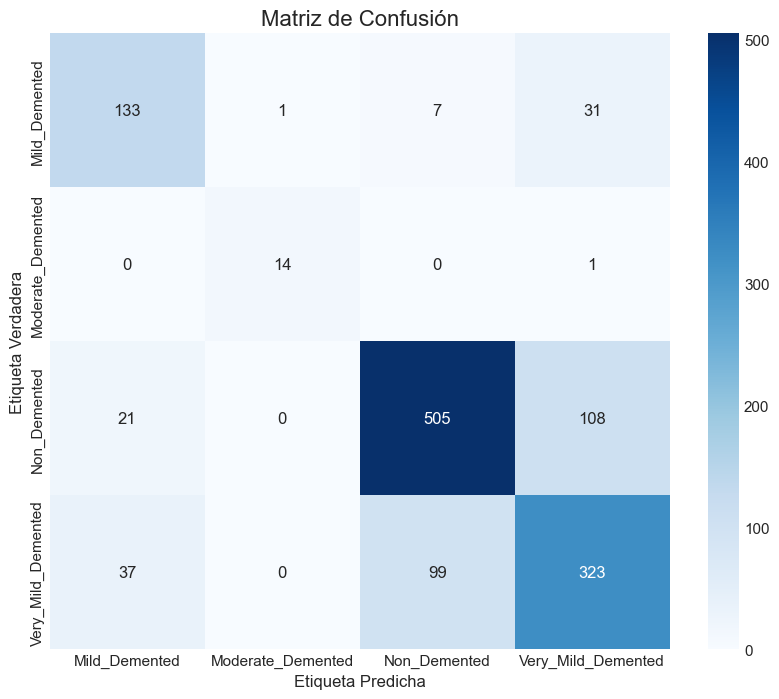

In [66]:
# 1. Reporte de Clasificación (Precision, Recall, F1-Score)
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test_encoded, y_pred_encoded, target_names=class_names))

# 2. Matriz de Confusión
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.ylabel('Etiqueta Verdadera', fontsize=12)
plt.show()

### 5.5. Curva ROC y Área Bajo la Curva (AUC)
Esta es una de las métricas más importantes para evaluar clasificadores, especialmente con datos desbalanceados, ya que mide la capacidad del modelo para distinguir entre clases. Para un problema multiclase, trazamos una curva ROC para cada clase en un formato "Uno vs. Resto" (One-vs-Rest).

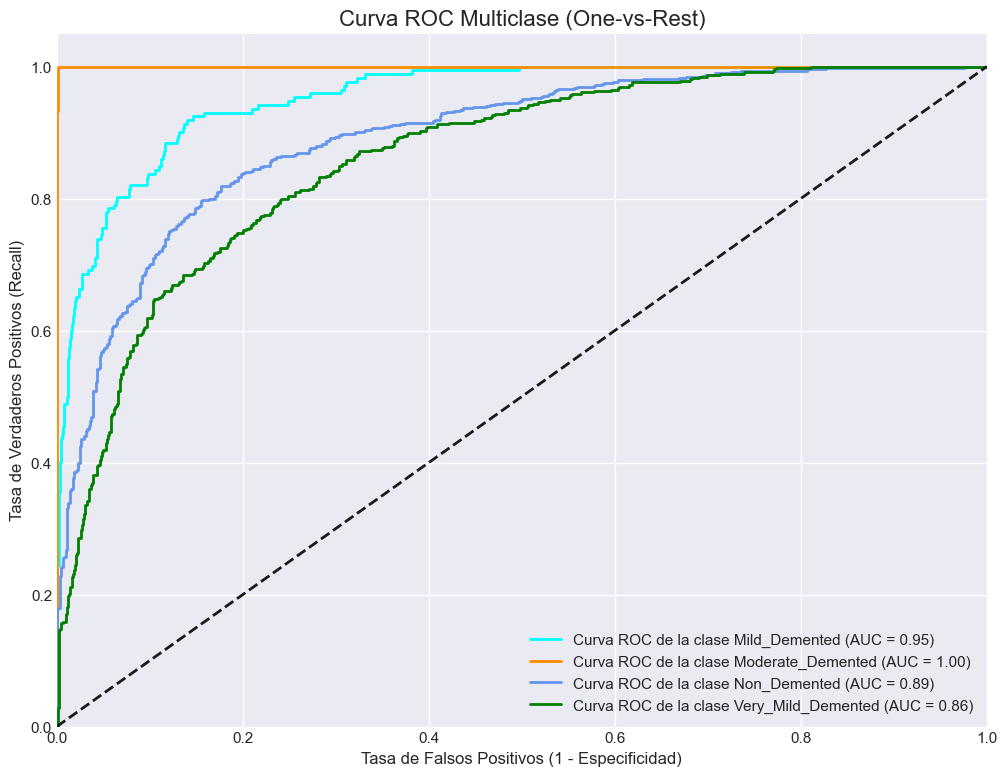

In [67]:
# --- Curva ROC y AUC para cada clase ---
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(N_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure(figsize=(12, 9))

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(N_CLASSES), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curva ROC de la clase {0} (AUC = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Línea de azar
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (Recall)', fontsize=12)
plt.title('Curva ROC Multiclase (One-vs-Rest)', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 5.6. Conclusiones Finales de la Evaluación
